<a href="https://colab.research.google.com/github/Vannod/SistemasFyC/blob/P2_Sistemas/Tarea_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis bursátil
Realizar un programa en Python o R que consultando una base de datos (la
que usted prefiera) calcule y grafique el RSI de un menú de acciones.

## Librerías

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Acciones
* Kohl's Corporation (KSS)
* Best Buy (BBY)
* General Motors Company (GM)

Escoja un activo
1. KSS
2. BBY
3. GM
4. Salir
Ingrese una opción: 2


[*********************100%***********************]  1 of 1 completed
<ipython-input-4-afb4342695a4>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_activo['RSI'] = RSI(datos_activo, 14)


Escoja un activo
1. KSS
2. BBY
3. GM
4. Salir
Ingrese una opción: 4


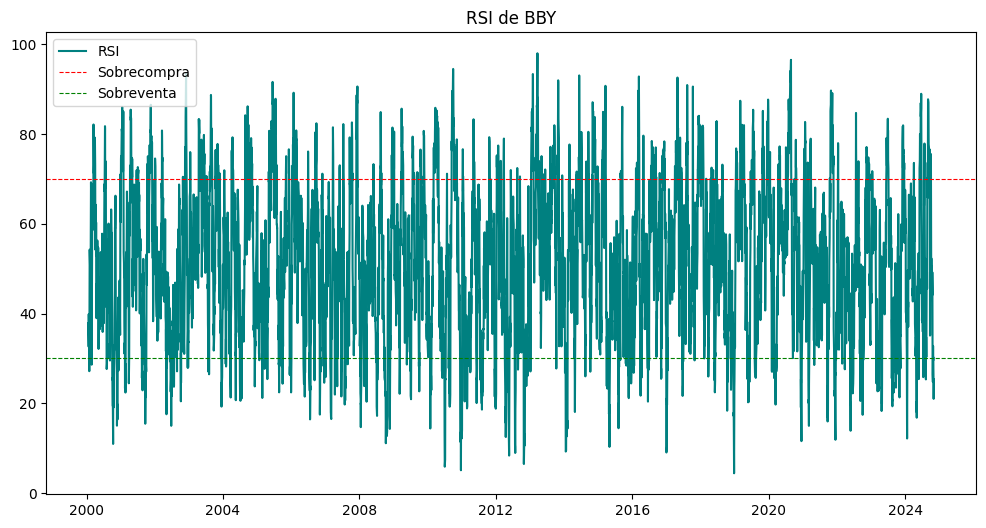

In [4]:
acciones = ['KSS', 'BBY', 'GM']

data_source = 'yahoo'
start_date = '2000-01-01'
end_date = '2024-11-01'

def RSI(datos, ventana):
    delta = datos['Close'].diff()
    ganancia = delta.where(delta > 0, 0) # Separa las ganancias de las pérdidas
    perdida = -delta.where(delta < 0, 0)

    ganancia_media = ganancia.rolling(window=ventana).mean() # Ganancia promedio
    perdida_media = perdida.rolling(window=ventana).mean() # Pérdida promedio

    rs = ganancia_media / perdida_media
    rsi = 100 - (100 / (1 + rs)) # Índice de fuerza relativa

    return rsi

def indicadores(acciones):
    datos = yf.download(acciones, start=start_date, end=end_date, group_by='ticker')

    for activo in acciones:
        datos_activo = datos[activo]

        # Indicadores

        # RSI
        datos_activo['RSI'] = RSI(datos_activo, 14)

        # Graficas

        plt.figure(figsize=(12, 6))

        # RSI
        plt.plot(datos_activo['RSI'], label='RSI', color='teal')
        plt.axhline(70, color='red', linestyle='--', linewidth=0.8, label='Sobrecompra')
        plt.axhline(30, color='green', linestyle='--', linewidth=0.8, label='Sobreventa')
        plt.title(f'RSI de {activo}')
        plt.legend()

def menu(acciones):
  for i in range(len(acciones)):
    print(f'{i+1}. {acciones[i]}')
  print('4. Salir')

while True:
  print('Escoja un activo')
  menu(acciones)
  opcion = input('Ingrese una opción: ')
  if opcion == 4:
    break

  try:
    opcion = int(opcion)
    if opcion == 1:
      indicadores([acciones[0]])
    elif opcion == 2:
      indicadores([acciones[1]])
    elif opcion == 3:
      indicadores([acciones[2]])
    elif opcion == 4:
      break
    else:
      print('Opción inválida')
  except:
    print('Opción inválida')